In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import copy
from matplotlib import animation
import IPython

## Preprocess Data

In [ ]:
# dir_path = '/content/drive/MyDrive/Stock Dataset/Daily_Return%.csv'

In [ ]:
# new_df = pd.DataFrame()

In [ ]:
# for item in os.listdir(dir_path):
#     df = pd.read_csv(dir_path + item)
    
#     df['Close/Last'] = (df['Close/Last'].str.replace("$", "")).astype(float)
#     df['Daily Return %'] = ((df['Close/Last'] / df['Close/Last'].shift(1)) - 1) * 100
#     df['Daily Return %'].fillna(0.0, inplace=True)

#     new_df[item.split(" ")[0]] = df['Daily Return %']
#     new_df['Date'] = df['Date']

In [ ]:
# new_df = pd.read_csv(dir_path)

## Various Portfolio Models


### 1. **Maximize expected return (disregard risk)**: 

* Maximize:  $W^T\ \dot\ E$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$


### 2. **Minimize risk (disregard expected return)**: 

* Minimize:  $W^T\ \dot\ Cov\ @ W\ =\ \sigma^2$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$


### 3. **Minimize risk for a given level of expected return p***: 

* Minimize:  $W^T\ \dot\ Cov\ \dot\ W\ =\ \sigma^2$

* Subject to:
    * $W^T\ \dot\ E\ =\ p^*$
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$



### 4. **Maximize return for a given level of risk** $\sigma^{2^*}$: 

* Maximize:  $W^T\ \dot\ E$

* Subject to:
    * $W^T\ \dot\ Cov\ \dot\ W\ =\ \sigma^2$
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$


### 5. **Maximize return and Minimize risk**: 

* Maximize:  $W^T\ \dot\ E$
* Minimize:  $W^T\ \dot\ Cov\ \dot\ W$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$

#### For simplicity first try to do **Model 1**

## Portfolio Model 1:

$$
    Return = \sum_{i=0}^{n} W_i * E_i = W\ @\ E
$$

where, 

$W_{i}$ = Weights of $i^{th}$ asset.

$E_{i}$ = Expected return of asset $i$


## Objective Function

* **Maximize** 
    
    $W.T\ @\ E$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$

## Portfolio Model 5:

$$
    Return = \sum_{i=0}^{n} W_i * E_i = W\ @\ E
$$

where, 

$W_{i}$ = Weights of $i^{th}$ asset.

$E_{i}$ = Expected return of asset $i$


## Objective Function

* **Maximize** 
    
    $W.T\ @\ E$

* **Minimize**

    $W @\ Cov\ @\ W^T$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$

This is a **multi-objective** task.

We can change the objective function to-

* **Minimize**

    $-(W.T\ @\ E) + \mu (W\ @\ Cov\ @\ W^T)$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$

i.e. **maximize return $\equiv$ minimize negative return**

where, $\mu \gt 0$ = how much an investor weights risk over expected
return = risk-aversion index that determines risk tolerance of an investor.

* A smaller value of $\mu$ indicates that the investor is more risk-seeking
* A larger value of $\mu$ indicates that the investor is more risk-averse.


If $\mu = 0$, then it will become Model 1 objective i.e. only minimize return disregard risk.

If $\mu = \infty$, then it will become Model 2 objective i.e. only minimize risk disregard return

## Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Stock Dataset/Daily_Return%.csv')

In [3]:
df

,AAPL,Date,SBUX,MSFT,CSCO,QCOM,AMZN,TSLA,AMD
0,0.000000,06/22/2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.384189,06/21/2022,-0.463847,0.240983,1.308240,1.825475,-0.247820,0.402395,0.047761
2,-3.172150,06/17/2022,-1.493969,-2.400095,-1.699139,-2.733339,-2.263526,-8.554232,-2.649481
3,-1.140164,06/16/2022,-1.280089,-1.082172,-0.161327,-0.140507,-2.410092,-1.688503,0.588452
4,4.128864,06/15/2022,4.566596,2.771768,1.108033,8.450588,3.868416,9.338339,8.836076
...,...,...,...,...,...,...,...,...,...
247,-0.459988,06/29/2021,0.411412,0.184570,-0.169811,-0.216889,0.231966,0.155951,-4.694986
248,-1.136947,06/28/2021,-0.026721,-0.987472,0.094500,-2.033375,-0.123255,1.169281,-2.725648
249,-1.239056,06/25/2021,0.712758,-1.376898,0.188822,-1.481534,-1.232037,-2.446568,-1.676619
250,0.225378,06/24/2021,-0.928875,0.630141,-0.527704,0.196150,1.399987,1.183265,0.560617


In [4]:
df.drop('Date', inplace=True, axis=1)

In [5]:
avg_daily_return = np.array([df[column].mean() for column in df.columns])

In [6]:
avg_daily_return

array([0.01240898, 0.18675523, 0.03438141, 0.09097775, 0.07647848,
       0.22212376, 0.04478286, 0.06377839])

In [7]:
expected_daily_return = avg_daily_return * len(df)

In [8]:
expected_daily_return

array([ 3.12706363, 47.06231689,  8.66411486, 22.92639186, 19.27257782,
       55.97518825, 11.28528022, 16.07215498])

In [9]:
expected_daily_return = expected_daily_return.reshape(-1, 1)

In [10]:
expected_daily_return

array([[ 3.12706363],
       [47.06231689],
       [ 8.66411486],
       [22.92639186],
       [19.27257782],
       [55.97518825],
       [11.28528022],
       [16.07215498]])

In [120]:
assets_covariance = df.cov()

In [121]:
assets_covariance

,AAPL,SBUX,MSFT,CSCO,QCOM,AMZN,TSLA,AMD
AAPL,3.479171,2.241229,2.595523,1.713686,3.303725,3.152236,4.353335,4.164809
SBUX,2.241229,4.002191,1.982140,1.444923,2.930417,2.709174,3.435902,3.613847
MSFT,2.595523,1.982140,3.181980,1.511088,3.137145,3.109144,3.850354,4.151222
CSCO,1.713686,1.444923,1.511088,3.112182,1.800175,1.593107,1.743919,2.301795
QCOM,3.303725,2.930417,3.137145,1.800175,7.075897,4.296707,5.372776,7.000591
AMZN,3.152236,2.709174,3.109144,1.593107,4.296707,6.822370,4.904870,5.228250
TSLA,4.353335,3.435902,3.850354,1.743919,5.372776,4.904870,15.182518,8.402622
AMD,4.164809,3.613847,4.151222,2.301795,7.000591,5.228250,8.402622,12.777921


In [118]:
assets_covariance.shape

(8, 8)

## Differential Evolution Algorithm - Approach 1

1. $x_{i, G} = 0, 1, 2,.., NP-1$
2. A trial vector $\bar v$ is created from $x$ using the formula-

    $\bar v = x_{r_1, G} + F * (x_{r_2, G} − x_{r_3, G} )$

    where, $r_1, r_2, r_3 \in [0, NP-1]$ integer and mutually different $F \gt 0$

    The integers $r_1$, $r_2$ and $r_3$ are chosen randomly from the interval $[0, NP-1]$ and are different from the running index $i$. $F$ is a real and constant factor which controls the amplification of the differential variation $(x_{r_2, G} - x_{r_3, G})$

3. In order to increase the diversity of the parameter vectors, the vector $\bar u$ is created-

    $\bar u = (u_0, u_1,.., u_{D-1})^T$

    with, 

$$
    \bar u_j= \begin{cases}
    \bar v_j, & {j = \langle n\rangle_D, \langle n+1\rangle_D,..,\langle n+L-1\rangle_D} \\
    (x_{i, G})_j, & {for\ all\ other\ j \in [0, D-1]}.
    \end{cases}
$$

Symbols used-

* $x$ = weights vector
* $NP$ = No. of population
* $F$ = mutation rate
* $D$ = Dimension
* $n$ = starting index
* $L$ = No. of parameters that going to be exchanged

4. $L$ is find by using pseudo algorithm-

```
L = 0;
do {
    L = L + 1;
} while(rand()< CR) AND (L < D));
```
where,  

probability $Pr(L \geq ν) = (CR)^{ν-1}, ν > 0.$ 

$CR \in [0,1]$ = crossover probability

5. In order to decide whether the new vector $\bar u$ shall become a population member of generation $G+1$, it will be compared to $x_{i, G}$ . If vector $\bar u$ yields a smaller objective function value than $x_{i, G},\ x_{i, G+1}$ is set to $\bar u$, otherwise the old value $x_{i, G}$ is retained. 

Differential Evolution works for **minimization problem**. So we need to convert the maximization problem to minimization.

Maximize: $W * E$

converted to

Minimize: $-(W * E)$

## Differential Evolution Algorithm - Approach 2

Same way as **Approach 1** but the vector $\bar v$ is different-

$$
    \bar v = x_{i, G} + \lambda * (x_{best, G} - x_{i, G}) + F * (x_{r_1, G} − x_{r_2, G})
$$

where, 

$\lambda$ = enhance the greediness of appraoch

$x_{best, G}$ = current best vector

$x_{i, G}$ = current vector

In [161]:
D = 8
NP = 2000
F = 1 # F > 0 (0, 2)
CR = 0.5 # [0, 1]
lmbd = 0.5 # lmbd > 0
mu = 1 # mu > 0

In [162]:
X = np.random.dirichlet(np.ones(D), size=NP)

In [163]:
X

array([[0.02459009, 0.0748256 , 0.22097447, ..., 0.03167618, 0.02270272,
        0.11408706],
       [0.03193425, 0.33248122, 0.04951359, ..., 0.06164287, 0.08840625,
        0.30442032],
       [0.15785684, 0.02857479, 0.03366701, ..., 0.0662281 , 0.20045445,
        0.16257889],
       ...,
       [0.09916966, 0.15649977, 0.15528583, ..., 0.11865743, 0.00959689,
        0.06320312],
       [0.18964385, 0.14667509, 0.04028316, ..., 0.08448651, 0.1429496 ,
        0.31545117],
       [0.33103721, 0.08130244, 0.11115451, ..., 0.01274656, 0.05277986,
        0.00918923]])

In [164]:
X.shape

(2000, 8)

In [165]:
np.array(X @ assets_covariance @ X.T).diagonal().reshape(NP, 1).shape

(2000, 1)

In [166]:
# Model 1 fitness function
def fitness_M1(W, E):
    portfolio_return = -(W @ E)
    return portfolio_return

In [167]:
# Model 5 fitness function
def fitness_M5(W, E, ACov):
    if W.shape[0] == NP:
        risk = np.array(W @ ACov @ W.T).diagonal().reshape(NP, 1)
    else:
        risk = W @ ACov @ W.T
    portfolio_return = -(W @ E) + (mu * risk)
    return portfolio_return 

In [168]:
# Differential Evolution Approach 1
def trial_vector_approach_1(X):
    r1, r2, r3 = np.random.choice([i for i in range(NP)], size=3, replace=False)

    v = np.absolute(X[r1] + (F * (X[r2] - X[r3])))
    
    return v

In [169]:
# Differential Evolution Approach 2
def trial_vector_approach_2(X, i, lmbd, bm):
    list_idx = [i for i in range(NP)]
    list_idx.remove(i)
    r1, r2 = np.random.choice(list_idx, size=2, replace=False)
    
    v = np.absolute(X[i] + (lmbd * (bm - X[i])) + (F * (X[r1] - X[r2])))
    
    return v

In [170]:
def randN():
    # [0.0, 1.0)
    return np.random.random(size=1)

In [171]:
def randomL(CR, D):
    L = 0
    while (randN() < CR) and (L < D):
        L += 1
    
    return L

In [172]:
def modifiedV_U(V, X):
    # [0, D)
    n = np.random.randint(low=0, high=D)

    L = randomL(CR, D)

    modulus_j = [j%D for j in range(n, n+L)]

    v = copy.deepcopy(V)
    for j in range(D):
        if j not in modulus_j:
            v[j] = X[j]

    return v

In [173]:
def compareXU_M1(u, x, E):
    # Call to Model 1
    result_u = fitness_M1(u, E)
    result_x = fitness_M1(x, E)

    member = u if result_u < result_x else x

    return member

In [174]:
def compareXU_M5(u, x, E, ACov):
    # Call to Model 1
    result_u = fitness_M5(u, E, ACov)
    result_x = fitness_M5(x, E, ACov)

    member = u if result_u < result_x else x

    return member

In [175]:
def normalizeMember(member):
    normalized_member = member/np.sum(member)

    return normalized_member


In [195]:
X_copy = copy.deepcopy(X)
E = copy.deepcopy(expected_daily_return)
ACov = copy.deepcopy(assets_covariance)

In [196]:
n_epochs = 500

min_idx = []
min_fitness_score = []
min_x_val = []
min_fitness_score_so_far = [0]
sum_vector = []

for epoch in range(n_epochs):
    print(f"Generation: {epoch}")
    print(X_copy)
    print(np.array(np.sum(X_copy, axis=1)))
    print('\n')

    sum_vector.append(np.sum(X_copy, axis=1))

    # fitness_score = fitness_M1(X_copy, E)
    fitness_score = fitness_M5(X_copy, E, ACov)
    fitness_score = fitness_score.flatten()
    min_fs = np.min(fitness_score)
    min_fs_idx = list(fitness_score).index(min_fs)
    min_x = list(X_copy[min_fs_idx])

    min_idx.append(min_fs_idx)
    min_fitness_score.append(min_fs)
    min_x_val.append(min_x)
    if min_fs < min_fitness_score_so_far[-1]:
        min_fitness_score_so_far.append(min_fs)

    best_member = X_copy[min_fs_idx]

    new_population = []
    for i in range(NP):
        # v = trial_vector(X_copy)
        v = trial_vector_approach_2(X_copy, i, lmbd, best_member)

        u = modifiedV_U(v, X_copy[i])

        # member = compareXU_M1(u, X_copy[i], expected_daily_return)
        member = compareXU_M5(u, X_copy[i], expected_daily_return, ACov)

        # To bring values between [0, 1]
        normalized_member = normalizeMember(member)

        new_population.append(normalized_member)

    new_population = np.array(new_population)
    # print(new_population)

    X_copy = new_population


Streaming output truncated to the last 5000 lines.


Generation: 206
[[3.03767661e-03 1.88164175e-01 2.00099174e-02 ... 7.54464168e-01
  1.16490048e-02 1.60767725e-02]
 [2.18764566e-04 2.27133442e-01 8.78122411e-03 ... 6.79634740e-01
  6.03843905e-03 2.21443837e-02]
 [1.03815506e-03 3.03381322e-01 7.99333103e-03 ... 6.24878274e-01
  1.02532961e-03 1.07871764e-02]
 ...
 [3.21437372e-03 2.31111001e-01 2.07027653e-03 ... 6.43072659e-01
  1.26065916e-02 1.95716919e-02]
 [1.02673806e-03 2.19116702e-01 1.23372237e-02 ... 6.43792236e-01
  2.26158445e-02 3.47507263e-02]
 [2.65072957e-04 8.85979984e-02 1.28056885e-02 ... 7.80479112e-01
  6.59355046e-03 5.22181290e-02]]
[1. 1. 1. ... 1. 1. 1.]


Generation: 207
[[3.03767661e-03 1.88164175e-01 2.00099174e-02 ... 7.54464168e-01
  1.16490048e-02 1.60767725e-02]
 [2.18764566e-04 2.27133442e-01 8.78122411e-03 ... 6.79634740e-01
  6.03843905e-03 2.21443837e-02]
 [1.03815506e-03 3.03381322e-01 7.99333103e-03 ... 6.24878274e-01
  1.02532961e-03 1.078717

In [197]:
min_idx

[1759,
 473,
 473,
 473,
 473,
 473,
 473,
 473,
 435,
 473,
 473,
 1724,
 1202,
 1515,
 636,
 1900,
 785,
 429,
 1384,
 1384,
 1428,
 1384,
 1384,
 1384,
 1384,
 722,
 722,
 677,
 881,
 881,
 881,
 956,
 956,
 956,
 956,
 1718,
 1718,
 1176,
 1215,
 1215,
 1215,
 1563,
 154,
 1545,
 1092,
 1545,
 1092,
 753,
 1508,
 1508,
 1508,
 753,
 1508,
 1276,
 1276,
 1276,
 1579,
 329,
 657,
 657,
 329,
 1229,
 1229,
 1229,
 1229,
 1048,
 1048,
 1048,
 1048,
 1048,
 1048,
 1712,
 1686,
 1686,
 1686,
 1712,
 1712,
 1686,
 1686,
 1494,
 1653,
 1653,
 1494,
 984,
 444,
 444,
 444,
 444,
 375,
 1012,
 1012,
 375,
 693,
 693,
 693,
 693,
 383,
 430,
 430,
 864,
 1907,
 1411,
 1411,
 1912,
 1912,
 159,
 1467,
 1467,
 1467,
 872,
 31,
 31,
 31,
 31,
 1159,
 1159,
 1159,
 1159,
 1159,
 774,
 1251,
 247,
 247,
 940,
 648,
 648,
 992,
 1562,
 1562,
 1562,
 1562,
 1562,
 1562,
 1176,
 1176,
 1176,
 1176,
 1176,
 253,
 29,
 29,
 29,
 253,
 253,
 253,
 1532,
 1532,
 83,
 83,
 1461,
 1461,
 1461,
 1461,
 1461

In [198]:
min_x_val

[[0.016598986155354163,
  0.2714537963904094,
  0.02032584102862678,
  0.11968559594916772,
  0.009717155523519967,
  0.5465367638989171,
  0.01322487881355973,
  0.0024569822404450917],
 [0.013160423878441126,
  0.6374004612158252,
  0.026072349218550887,
  0.02243004281080299,
  0.031199041826068426,
  0.26330763095845705,
  0.005122491150556605,
  0.0013075589412975598],
 [0.01316042387844113,
  0.6374004612158253,
  0.026072349218550894,
  0.022430042810802995,
  0.031199041826068433,
  0.2633076309584571,
  0.005122491150556606,
  0.00130755894129756],
 [0.01316042387844113,
  0.6374004612158253,
  0.026072349218550894,
  0.022430042810802995,
  0.031199041826068433,
  0.2633076309584571,
  0.005122491150556606,
  0.00130755894129756],
 [0.01316042387844113,
  0.6374004612158253,
  0.026072349218550894,
  0.022430042810802995,
  0.031199041826068433,
  0.2633076309584571,
  0.005122491150556606,
  0.00130755894129756],
 [0.01316042387844113,
  0.6374004612158253,
  0.0260723492185

In [199]:
min_fitness_score

[-42.84637950967836,
 -42.697149584873905,
 -42.69714958487391,
 -42.69714958487391,
 -42.69714958487391,
 -42.69714958487391,
 -42.69714958487391,
 -42.69714958487391,
 -43.95630346333377,
 -42.69714958487391,
 -42.69714958487391,
 -40.955081107777886,
 -41.25270580450605,
 -40.99464752090862,
 -41.95597391463021,
 -41.21257789942295,
 -42.97533371485068,
 -43.73786526692231,
 -44.05386066413435,
 -44.05386066413435,
 -44.503436037991584,
 -44.05386066413435,
 -44.05386066413435,
 -44.05386066413435,
 -44.05386066413435,
 -44.10533507988159,
 -44.10533507988159,
 -44.214925465571355,
 -44.946733187684096,
 -44.946733187684096,
 -44.946733187684096,
 -45.050562573278114,
 -45.05056257327812,
 -45.05056257327812,
 -45.05056257327812,
 -45.12047739667852,
 -45.120477396678524,
 -45.17633079295286,
 -46.8644601468489,
 -46.68297596357337,
 -45.99364797016155,
 -46.06103223187255,
 -45.724491500914375,
 -45.59647909967287,
 -46.098333009026305,
 -46.44140721152606,
 -46.09833300902631,
 -4

In [200]:
min_fitness_score_so_far

[0,
 -42.84637950967836,
 -43.95630346333377,
 -44.05386066413435,
 -44.503436037991584,
 -44.946733187684096,
 -45.050562573278114,
 -45.05056257327812,
 -45.12047739667852,
 -45.120477396678524,
 -45.17633079295286,
 -46.8644601468489,
 -47.07917155789131,
 -47.09727552494227,
 -47.70061033260804,
 -47.708519342630794,
 -47.866952113832895,
 -47.8669521138329,
 -47.930002801277475,
 -47.97798962500922,
 -48.07730236446345,
 -48.11105312419429,
 -48.30468683306461,
 -48.47186557601371,
 -48.48323614703199,
 -48.62360008631542,
 -48.684699942194435,
 -48.68469994219445,
 -48.72068273392665,
 -48.73181560314825]

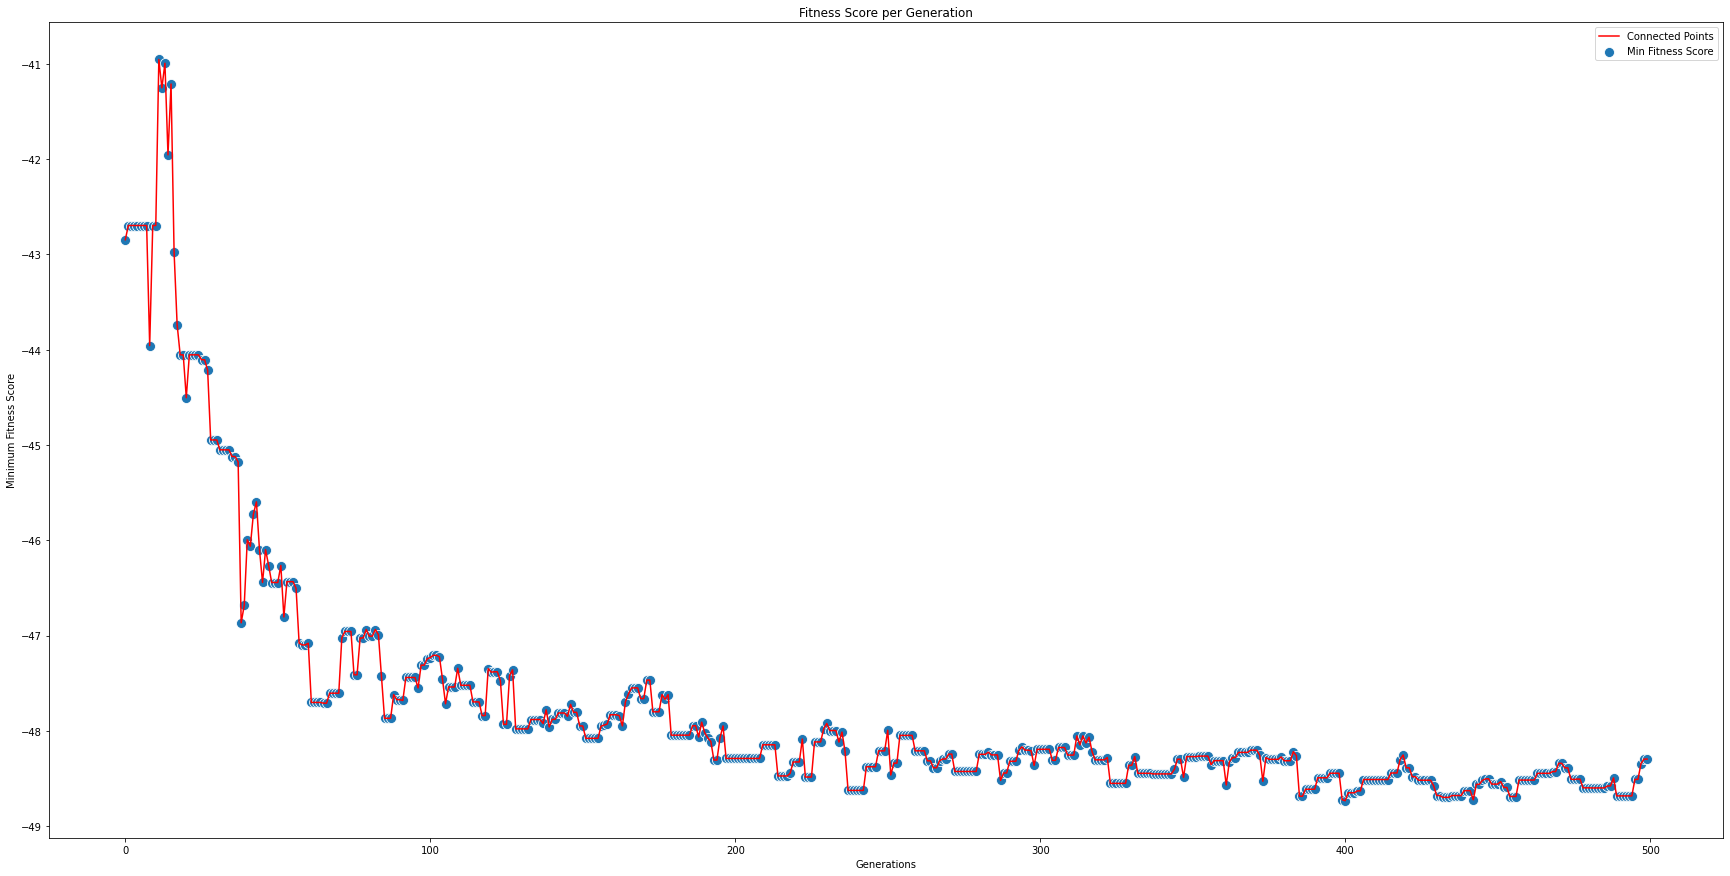

In [201]:
plt.figure(figsize=(30, 15))

sb.lineplot(x=[i for i in range(n_epochs)], y=min_fitness_score, color='r')
sb.scatterplot(x=[i for i in range(n_epochs)], y=min_fitness_score, s=100, legend='full')
plt.xlabel("Generations")
plt.ylabel("Minimum Fitness Score")
plt.title("Fitness Score per Generation")
plt.legend(["Connected Points", "Min Fitness Score"])

In [179]:
# fig, ax = plt.subplots(figsize=(15,10))

# def animate(i):
#     ax.clear()
#     sb.lineplot(x=[i for i in range(n_epochs)][i], y=min_fitness_score[i], ax=ax)

#     plt.title("Single Datapoint and SOM and weights_as_som")


# anim = animation.FuncAnimation(fig, animate, frames=len(min_fitness_score), repeat=False, interval=100)
# IPython.display.HTML(anim.to_html5_video())

## References:

1. https://www.researchgate.net/publication/227242104_Differential_Evolution_-_A_Simple_and_Efficient_Heuristic_for_Global_Optimization_over_Continuous_Spaces

2. https://scholar.rose-hulman.edu/cgi/viewcontent.cgi?article=1193&context=rhumj